# Working with Time Series using Pandas

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Datetime Module

In [2]:
datetime.datetime(2000, 1, 1)

datetime.datetime(2000, 1, 1, 0, 0)

In [3]:
datetime.datetime.strptime("2000/12/1", "%Y/%m/%d")

datetime.datetime(2000, 12, 1, 0, 0)

In [5]:
datetime.datetime(2000, 1, 1, 0, 0).strftime("%Y.%m.%d")

'2000.01.01'

## Pandas for Time Series

In [7]:
pd.to_datetime("13.08.2000", format = '%d.%m.%Y') 

Timestamp('2000-08-13 00:00:00')

In [8]:
pd.to_datetime("13/8/2000")

Timestamp('2000-08-13 00:00:00')

## Pandas Timestamp object

Timestamp objects can be seen as Pandas' version of datetime objects and indeed, the Timestamp class is a subclass of datetime Which means they can be used interchangeably in many cases:

In [9]:
ts = pd.to_datetime(946684800000000000)

In [10]:
ts

Timestamp('2000-01-01 00:00:00')

In [11]:
ts.year, ts.month, ts.day, ts.weekday()

(2000, 1, 1, 5)

Timestamp objects are an important part of time series capabilities of Pandas, since timestamps are the building block of DateTimeIndex objects:

In [12]:
index = [pd.Timestamp("2000-01-01"),
 pd.Timestamp("2000-01-02"),
 pd.Timestamp("2000-01-03")]

ts = pd.Series(np.random.randn(len(index)), index=index)
ts

2000-01-01    0.914301
2000-01-02   -0.918772
2000-01-03    1.611964
dtype: float64

In [13]:
ts.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03'], dtype='datetime64[ns]', freq=None)

There are a few things to note here: We create a list of timestamp objects and pass
it to the series constructor as index. This list of timestamps gets converted into a
DatetimeIndex on the fly. If we had passed only the date strings, we would not
get a DatetimeIndex, just an index:

In [14]:
ts = pd.Series(np.random.randn(len(index)), index=[
 "2000-01-01", "2000-01-02", "2000-01-03"])

In [15]:
ts.index

Index(['2000-01-01', '2000-01-02', '2000-01-03'], dtype='object')

However, the to_datetime function is flexible enough to be of help, if all we have
is a list of date strings:

In [16]:
index = pd.to_datetime(["2000-01-01", "2000-01-02", "2000-01-03"])
ts = pd.Series(np.random.randn(len(index)), index=index)
ts.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03'], dtype='datetime64[ns]', freq=None)

## Generate sequences of time stamps of fixed intervals

With to_datetime we are able to convert a variety of strings and even lists of strings
into timestamp or DatetimeIndex objects. Sometimes we are not explicitly given all
the information about a series and we have to generate sequences of time stamps of
fixed intervals ourselves.
Pandas offer another great utility function for this task: date_range.

The date_range function helps to generate a fixed frequency datetime index
between start and end dates. It is also possible to specify either the start or end date
and the number of timestamps to generate.

The frequency can be specified by the freq parameter, which supports a number of
offsets. You can use typical time intervals like hours, minutes, and seconds:

In [17]:
pd.date_range(start="2000-01-01", periods=3, freq='H')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:00:00',
               '2000-01-01 02:00:00'],
              dtype='datetime64[ns]', freq='H')

In [18]:
pd.date_range(start="2000-01-01", periods=3, freq='T')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 00:01:00',
               '2000-01-01 00:02:00'],
              dtype='datetime64[ns]', freq='T')

In [20]:
 pd.date_range(start="2000-01-01", periods=5, freq='S')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 00:00:01',
               '2000-01-01 00:00:02', '2000-01-01 00:00:03',
               '2000-01-01 00:00:04'],
              dtype='datetime64[ns]', freq='S')

The freq attribute allows us to specify a multitude of options. Pandas has been
used successfully in finance and economics, not least because it is really simple to
work with business dates as well. As an example, to get an index with the first three
business days of the millennium, the B offset alias can be used:

In [21]:
pd.date_range(start="2000-01-01", periods=3, freq='B')

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05'], dtype='datetime64[ns]', freq='B')

The table at the link shows the available offset aliases and can be also be looked up
in the Pandas documentation on time series under https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html

Moreover, The offset aliases can be used in combination as well. Here, we are
generating a datetime index with five elements, each one day, one hour, one minute
and one second apart:

In [22]:
pd.date_range(start="2000-01-01", periods=5, freq='1D1h1min10s')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-02 01:01:10',
               '2000-01-03 02:02:20', '2000-01-04 03:03:30',
               '2000-01-05 04:04:40'],
              dtype='datetime64[ns]', freq='90070S')

Some frequencies allow us to specify an anchoring suffix, which allows us to express
intervals, such as every Friday or every second Tuesday of the month:

In [23]:
pd.date_range(start="2000-01-01", periods=5, freq='W-FRI')

DatetimeIndex(['2000-01-07', '2000-01-14', '2000-01-21', '2000-01-28',
               '2000-02-04'],
              dtype='datetime64[ns]', freq='W-FRI')

In [24]:
pd.date_range(start="2000-01-01", periods=5, freq='WOM-2TUE') 

DatetimeIndex(['2000-01-11', '2000-02-08', '2000-03-14', '2000-04-11',
               '2000-05-09'],
              dtype='datetime64[ns]', freq='WOM-2TUE')

Finally, we can merge various indexes of different frequencies. The possibilities
are endless. We only show one example, where we combine two indexes – each over
a decade – one pointing to every first business day of a year and one to the last day
of February:

In [25]:
s = pd.date_range(start="2000-01-01", periods=10, freq='BAS-JAN')
t = pd.date_range(start="2000-01-01", periods=10, freq='A-FEB')
s.union(t)

DatetimeIndex(['2000-01-03', '2000-02-29', '2001-01-01', '2001-02-28',
               '2002-01-01', '2002-02-28', '2003-01-01', '2003-02-28',
               '2004-01-01', '2004-02-29', '2005-01-03', '2005-02-28',
               '2006-01-02', '2006-02-28', '2007-01-01', '2007-02-28',
               '2008-01-01', '2008-02-29', '2009-01-01', '2009-02-28'],
              dtype='datetime64[ns]', freq=None)

We see, that 2000 and 2005 did not start on a weekday and that 2000, 2004, and 2008
were the leap years.

## Simple Plotting and slicing dicing of time series

We have seen two powerful functions so far, to_datetime and date_range. Now
we want to dive into time series by first showing how you can create and plot time
series data with only a few lines. In the rest of this section, we will show various
ways to access and slice time series data.

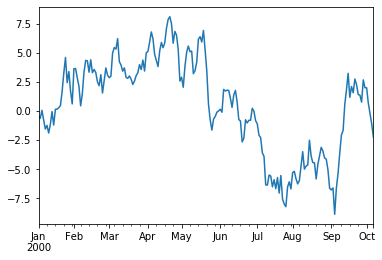

In [26]:
index = pd.date_range(start='2000-01-01', periods=200, freq='B')
ts = pd.Series(np.random.randn(len(index)), index=index)
walk = ts.cumsum()
walk.plot()

Just as with usual series objects, you can select parts and slice the index:

In [27]:
ts.head()

2000-01-03   -0.469874
2000-01-04   -0.164873
2000-01-05    0.688583
2000-01-06   -0.811420
2000-01-07   -0.796378
Freq: B, dtype: float64

In [28]:
ts[0]

-0.4698743466089746

We can use date strings as keys, even though our series has a DatetimeIndex:

In [29]:
ts['2000-01-03']

-0.4698743466089746

Even though the DatetimeIndex is made of timestamp objects, we can use datetime
objects as keys as well:

In [30]:
ts[datetime.datetime(2000, 1, 3)]

-0.4698743466089746

Access is similar to lookup in dictionaries or lists, but more powerful. We can, for
example, slice with strings or even mixed objects:

In [31]:
ts['2000-01-03':'2000-01-05']

2000-01-03   -0.469874
2000-01-04   -0.164873
2000-01-05    0.688583
Freq: B, dtype: float64

In [32]:
ts['2000-01-03':datetime.datetime(2000, 1, 5)]

2000-01-03   -0.469874
2000-01-04   -0.164873
2000-01-05    0.688583
Freq: B, dtype: float64

It is even possible to use partial strings to select groups of entries. If we are only
interested in February, we could simply write:

In [33]:
ts['2000-02']

2000-02-01    3.028084
2000-02-02    0.019986
2000-02-03   -0.808941
2000-02-04   -0.719256
2000-02-07   -1.680814
2000-02-08    1.022560
2000-02-09    1.864631
2000-02-10    1.016845
2000-02-11   -0.033032
2000-02-14   -0.981384
2000-02-15    1.071376
2000-02-16   -1.113909
2000-02-17    0.281303
2000-02-18   -0.265361
2000-02-21   -0.796356
2000-02-22   -0.338314
2000-02-23    0.951799
2000-02-24   -1.579085
2000-02-25    1.072497
2000-02-28    1.083813
2000-02-29   -0.620416
Freq: B, dtype: float64

To see all entries from March until May, including:

In [34]:
ts['2000-03':'2000-05']

2000-03-01   -0.220147
2000-03-02    0.135613
2000-03-03    1.981791
2000-03-06    0.475340
2000-03-07   -0.134205
                ...   
2000-05-25   -0.882115
2000-05-26    0.938742
2000-05-29    0.233536
2000-05-30    0.367333
2000-05-31    0.112955
Freq: B, Length: 66, dtype: float64

Time series can be shifted forward or backward in time. The index stays in place,
the values move:

In [35]:
small_ts = ts['2000-02-01':'2000-02-05']
small_ts

2000-02-01    3.028084
2000-02-02    0.019986
2000-02-03   -0.808941
2000-02-04   -0.719256
Freq: B, dtype: float64

In [36]:
small_ts.shift(2)

2000-02-01         NaN
2000-02-02         NaN
2000-02-03    3.028084
2000-02-04    0.019986
Freq: B, dtype: float64

In [37]:
small_ts.shift(-2)

2000-02-01   -0.808941
2000-02-02   -0.719256
2000-02-03         NaN
2000-02-04         NaN
Freq: B, dtype: float64

# Passenger Count Case Study

JetRail is a new form of transportation. JetRail uses Jet propulsion technology to run rails and move people at a high speed! You are provided with traffic data of JetRail since inception. In order to efficiently manage the business and manpower for the coming months, it is crucial to estimate the expected traffic on JetRail. Your task is to use this data and forecast the traffic on JetRail for the next 7 months.
 

**Data Description**
- Date: Store the date when the observation was taken
- Count: Holds the number passengers for the given date

## Passenger count time series

In [38]:
train = pd.read_csv("data/train_data.csv", date_parser=['Date'])

### Set the index to be datetime

In [39]:
train = train.set_index(pd.DatetimeIndex(train['Date']))

In [40]:
train

,Date,count
Date,,
2012-08-25,2012-08-25,3
2012-08-26,2012-08-26,3
2012-08-27,2012-08-27,2
2012-08-28,2012-08-28,2
2012-08-29,2012-08-29,2
...,...,...
2014-03-21,2014-03-21,149
2014-03-22,2014-03-22,129
2014-03-23,2014-03-23,119


In [ ]:
train.drop(['Date'],axis = 1,inplace = True)

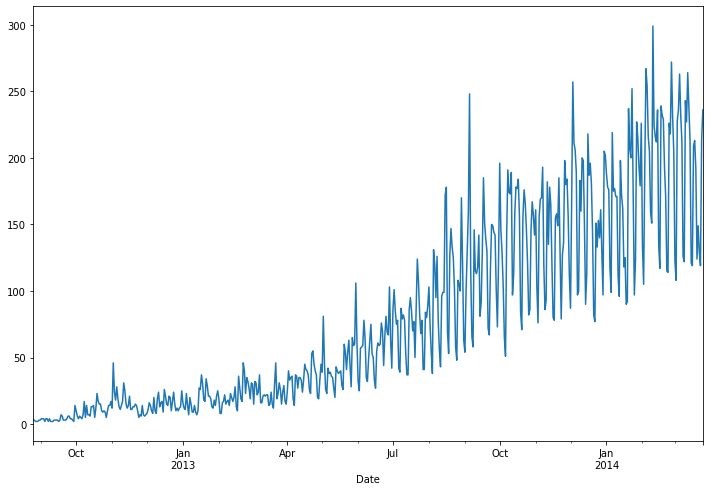

In [41]:
plt.figure(figsize=(12,8))
train['count'].plot()

# Resampling

- We have data at daily level

In [42]:
# downsampling
weekly_data = train.resample('W').mean()

we can downsample this time series to larger
intervals, for example, weeks. We can choose an aggregation function as well.
The default aggregation is to take all the values and calculate the mean:

In [43]:
# plotting
print(weekly_data.shape)
weekly_data.head()

(84, 1)


,count
Date,
2012-08-26,3.000000
2012-09-02,2.857143
2012-09-09,3.142857
2012-09-16,2.571429
2012-09-23,4.142857


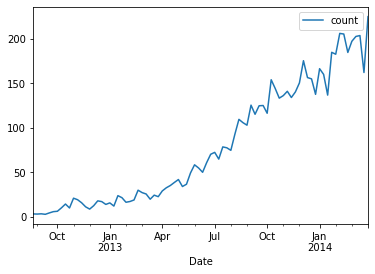

In [44]:
weekly_data.plot()

Similarly we can upsample and forward fill or apply a custom function as well to fill the values

In [45]:
train.head(20)

,Date,count
Date,,
2012-08-25,2012-08-25,3
2012-08-26,2012-08-26,3
2012-08-27,2012-08-27,2
2012-08-28,2012-08-28,2
2012-08-29,2012-08-29,2
2012-08-30,2012-08-30,3
2012-08-31,2012-08-31,3
2012-09-01,2012-09-01,4
2012-09-02,2012-09-02,4


In [46]:
train.resample('H').ffill().head()

,Date,count
Date,,
2012-08-25 00:00:00,2012-08-25,3
2012-08-25 01:00:00,2012-08-25,3
2012-08-25 02:00:00,2012-08-25,3
2012-08-25 03:00:00,2012-08-25,3
2012-08-25 04:00:00,2012-08-25,3


In [47]:
train.resample('H').interpolate().head(50)

,Date,count
Date,,
2012-08-25 00:00:00,2012-08-25,3.000000
2012-08-25 01:00:00,NaN,3.000000
2012-08-25 02:00:00,NaN,3.000000
2012-08-25 03:00:00,NaN,3.000000
2012-08-25 04:00:00,NaN,3.000000
2012-08-25 05:00:00,NaN,3.000000
2012-08-25 06:00:00,NaN,3.000000
2012-08-25 07:00:00,NaN,3.000000
2012-08-25 08:00:00,NaN,3.000000


<Figure size 576x288 with 0 Axes>

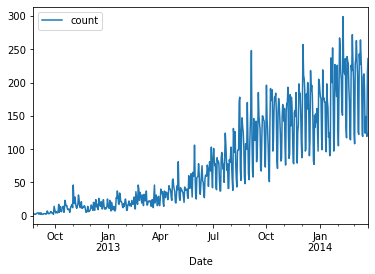

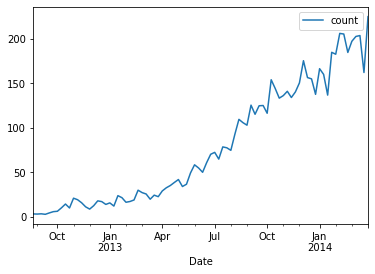

In [48]:
plt.figure(figsize=(8,4))

train.plot()
weekly_data.plot()

## Timezones

In [49]:
t = pd.Timestamp('2000-01-01')

In [50]:
t.tz is None

True

In [51]:
t = pd.Timestamp('2000-01-01', tz='Africa/Johannesburg')

In [52]:
t.tz

<DstTzInfo 'Africa/Johannesburg' SAST+2:00:00 STD>

Check all timezones here: https://en.wikipedia.org/wiki/List_of_tz_database_time_zones

This works for ranges as well:

In [53]:
rng = pd.date_range('1/1/2000 00:00', periods=10, freq='D', tz='Europe/London')

In [54]:
rng

DatetimeIndex(['2000-01-01 00:00:00+00:00', '2000-01-02 00:00:00+00:00',
               '2000-01-03 00:00:00+00:00', '2000-01-04 00:00:00+00:00',
               '2000-01-05 00:00:00+00:00', '2000-01-06 00:00:00+00:00',
               '2000-01-07 00:00:00+00:00', '2000-01-08 00:00:00+00:00',
               '2000-01-09 00:00:00+00:00', '2000-01-10 00:00:00+00:00'],
              dtype='datetime64[ns, Europe/London]', freq='D')

Sometimes, you will already have a time zone unaware time series object that you
would like to make time zone aware. The tz_localize function helps to switch
between time zone aware and time zone unaware objects:

In [55]:
rng = pd.date_range('1/1/2000 00:00', periods=10, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts.index.tz is None

True

In [56]:
ts

2000-01-01    1.942734
2000-01-02   -0.207280
2000-01-03    0.366210
2000-01-04   -0.524036
2000-01-05   -2.127423
2000-01-06    0.230820
2000-01-07    0.447178
2000-01-08   -0.400013
2000-01-09    0.136984
2000-01-10    0.646346
Freq: D, dtype: float64

In [57]:
ts_utc = ts.tz_localize('UTC')
ts_utc.index.tz

<UTC>

To move a time zone aware object to other time zones, you can use the tz_convert
method:

In [58]:
ts_utc.tz_convert('Europe/Berlin').index.tz

<DstTzInfo 'Europe/Berlin' LMT+0:53:00 STD>

Finally, to detach any time zone information from an object, it is possible to pass
None to either tz_convert or tz_localize:

In [59]:
ts_utc.tz_convert(None).index.tz is None

True

## Timedelta

Along with the powerful timestamp object, which acts as a building block for the
DatetimeIndex, there is another useful data structure, which has been introduced
in Pandas 0.15 – the Timedelta. The Timedelta can serve as a basis for indices as well,
in this case a TimedeltaIndex.
Timedeltas are differences in times, expressed in difference units. The Timedelta
class in Pandas is a subclass of datetime.timedelta from the Python standard
library. As with other Pandas data structures, the Timedelta can be constructed from
a variety of inputs:

In [60]:
pd.Timedelta('1 days')

Timedelta('1 days 00:00:00')

In [62]:
pd.Timedelta('-1 days 2 min 10s 3us')

Timedelta('-1 days +00:00:00')

In [63]:
pd.Timedelta(days=1,seconds=1)

Timedelta('1 days 00:00:01')

As you would expect, Timedeltas allow basic arithmetic:

In [69]:
pd.Timedelta(days=1) + pd.Timedelta(seconds=60)

Timedelta('1 days 00:01:00')

Similar to to_datetime, there is a to_timedelta function that can parse strings or
lists of strings into Timedelta structures or TimedeltaIndices:

In [66]:
pd.to_timedelta('20.1s')

Timedelta('0 days 00:00:20.100000')